In [1]:
# veri görselleştirme kütüphaneleri
# * matplotlib (ana-kütüphane) (low-level)
# * pandas (high-level)
# * seaborn (high-level) **kullanacağımız kütüphane
# * ggplot (high-level)
# * bokeh (matplotlib'den türememiş)
# * plot.ly

# Veriye ilk bakış #

In [17]:
import seaborn as sns

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
# Verisetini ilk gördüğümüzde yapılacaklar : 

In [19]:
# 1 - Veri setinin hikayesi nedir?

# verisetini genellikle biz oluştururuz ve parçaları diğer setlerden toparlarız.
# burada önemli olan aldığımız parçaların anlamlarının ne olduğudur.
# bu veri nedir, ne için oluşturulmuş, ne işime yarayacak?
# bu bağlamda verisetindeki verileri çözümlememiz kolaylaşacak.

In [20]:
# 2 - asıl verisetinin yedeğini alın.

In [21]:
df = planets.copy()

In [22]:
# 3 - verisetinin yapısal bilgilerine ulaş

In [23]:
df.info() # object kategorik bir değişkendir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [24]:
# object tipini category tipe çevirmek

In [25]:
import pandas as pd
df.method = pd.Categorical(df.method) # çeviren method
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# Veri Setinin Betimlenmesi #

In [26]:
df.shape

(1035, 6)

In [27]:
df.columns

Index([u'method', u'number', u'orbital_period', u'mass', u'distance', u'year'], dtype='object')

In [28]:
# sayısal değişkenlerin standart-sapması | ortalaması | max-min değerlerini inceleyip fikir sahibi olmalıyız.

df.describe().T # describe fonksiyonu kategorik değişkenleri çıkarıp numerik değişkenlerin özetini çıkarır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [29]:
# bütün değişkenleri görmek için
df.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


# Eksik Değerlerin İncelenmesi #

In [30]:
# hiç eksik gözlem (değer) var mı?
df.isnull().values.any()

True

In [31]:
# hangi değişkende kaçar tane var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [32]:
# na değerlerine 0 basma:
# eksiklik önemli bir konudur direkt 0 basmak riskli olabilir. çıkarılacak sonuçları değiştirebilir.
# df['degisken_ismi'].fillna(0,inplace = True)

In [33]:
# na yerine ortalama koyma
# df[degisken_ismi].fillna(df.degisken_ismi.mean(),inplace = True)

# Sadece Kategorik Değişkenler ve Özetleri #

In [34]:
category_df = df.select_dtypes(include=['category'])

In [35]:
category_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


# Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek #

In [36]:
category_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [37]:
category_df['method'].value_counts().count() # kaç tane kategory değeri var

10

# Kategorik Değişkenin Sınıflarının Frekansına Erişmek #

In [38]:
category_df['method'].value_counts() # farklı category değerlerinin sıklıklarını (frekans) görüyoruz.

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

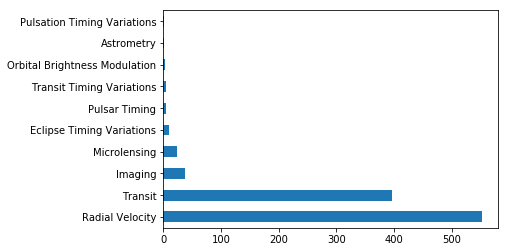

In [39]:
# bunu grafiğe dökmek için.
category_df['method'].value_counts().plot.barh();

# Sürekli Değişken Özetleri #

In [40]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [41]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


# Dağılım Grafikleri #

## Barplot ##

### Veri setimizin hikayesi ###

price : dolar cinsinde  fiyat (326 - 18,823)<br>
carat : ağırlık (0.2-5.01)<br>
cut : kalite (Fair,Good,Very Good,Premium,Ideal)<br>
color : renk (from J (worst) to D(best))<br>
clarity : temizliği,berraklığı (I1 (worst), SI2,SI1,VS2,VS1,VVS1,IF (best))<br>
x : length in mm(0,10.74)<br>
y : width in mm(0-58.9)<br>
z : depth in mm(0.31.8)<br>
depth : toplam derinlik yüzdesi = z/mean(x,y) = 2*z /(x+y) (43-79)<br>
table : elmasın en geniş noktasına göre genişliği (43-95)<br>


In [42]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Veri Setine Hızlı Bakış ###

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [45]:
diamond_categories = df.select_dtypes(include = ['object']) # kategorik değişkenlerimiz.
diamond_categories.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [46]:
diamond_categories.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [48]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [49]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [50]:
# kategorik değişkenleri ordinal kategorik yapmak
from pandas.api.types import CategoricalDtype

In [51]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [52]:
category_order = ['Fair','Good','Very Good','Premium','Ideal'] # sıralamayı kendimiz belirtmessek kendi kafasına göre yapacaktır.

df.cut = df.cut.astype(CategoricalDtype(ordered=True,categories=category_order))

In [53]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [54]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [55]:
## Barplot

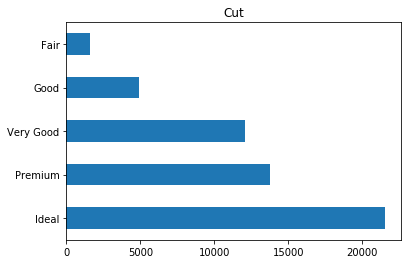

In [56]:
(df['cut'].
 value_counts().
 plot.barh().
 set_title('Cut'));

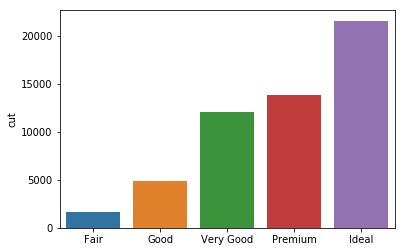

In [57]:
# seaborn ile barplot
x = df.cut.value_counts().index
y = y=df.cut.value_counts()

sns.barplot(x,y,data=df)

In [58]:
df.cut.index

RangeIndex(start=0, stop=53940, step=1)

# Sütun Grafik Çarprazlamalar #

In [59]:
# birbirine bağlı olabileceğini düşündüğümüz 2 değişkenin birbirine göre davranışlarını gördüğümüz
# sütun grafiktir.

In [60]:
# catplot => categoric plot 

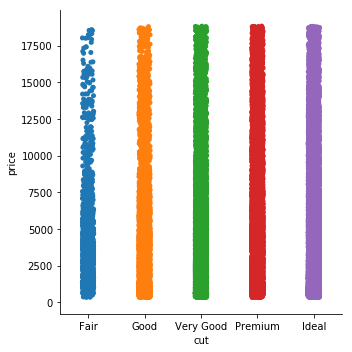

In [61]:
sns.catplot(x='cut',y='price',data=df); 
# price değişkeni muhtemel kaliteye bağımlı değişken bu yüzden kontrol edelim.

In [62]:
# fair' e odaklanacak olursak yüksek fiyatlarda yoğunluğu az olacağından teorimizi destekliyor.

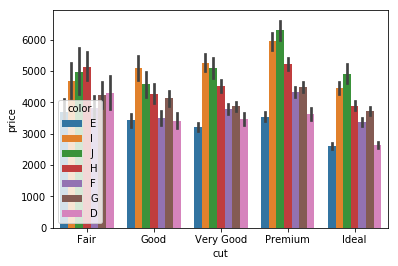

In [63]:
# bir boyut daha ekleyelim.
sns.barplot(x='cut',y='price',hue='color',data=df);
# görüldüğü üzere ideal değişkenini çok yoğun yapan özellikleri görmüş olduk.

In [64]:
# peki neden price axisi 0-6000 arasında?
# sebebi barplot 3. bir değişken verildiğinde verisetini 2 değişkene göre gruplar. 
# price değişkeni de bu gruplamanın ortalamasına göre aralıklandırılır.

df.groupby(['cut','color'])['price'].aggregate('mean').unstack() #yapılan işlem tam olarak budur.

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384


In [65]:
#sns.barplot(x='price',y='carat',data=df);

# Histogram ve Yoğunluk # 

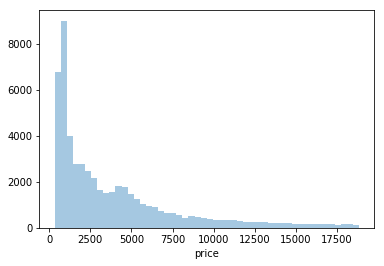

In [66]:
# histogram grafiği iki sayısal-sürekli değişkenin dağılımı ile ilgili bilgi verir.

sns.distplot(df.price , kde=False); # price-count histogram

# kde yoğunluk belirtecidir.

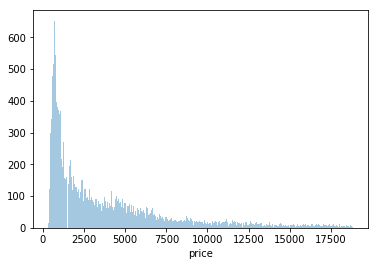

In [67]:
sns.distplot(df.price, bins=1000 , kde = False); # bins sütunların sayısını belirtir. çok olması grafiği hassaslaştırır.

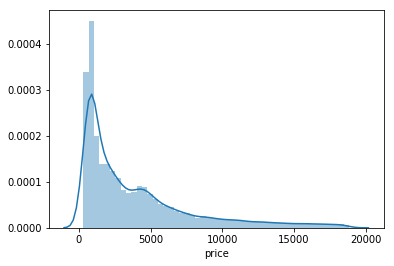

In [68]:
sns.distplot(df.price); # kde => yoğunluk / olasılık grafiğidir. 2 grafiği bir arada gösterebilmek için y otomatik düzenlendi.

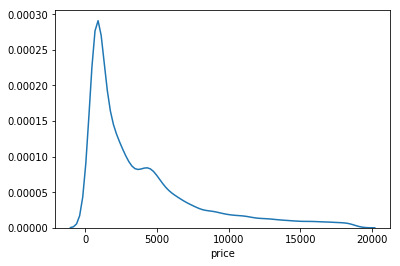

In [69]:
sns.distplot(df.price, hist=False); # historgram kaldırılmış hali

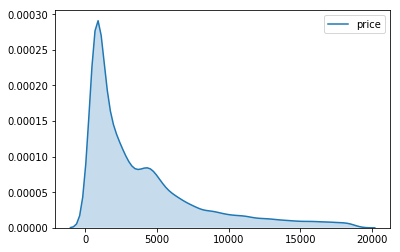

In [70]:
sns.kdeplot(df.price, shade=True); # kde doldurulmuş hali yoğunluk-olasılık
# shade => içini doldur

## Histogram ve Yoğunluk Çaprazlama ##

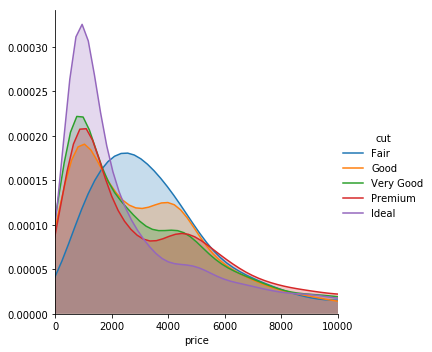

In [71]:
(sns.
 FacetGrid(df,
           hue='cut',
           height=5,
           xlim=(0,10000))
.map(sns.kdeplot,'price',shade=True)
.add_legend()
);

# fiyat-yoğunluk|olasılık ve kategori dağılımını gösteren bir histogram oluşturduk.
# grafikten anladığımız üzere en iyi kaliteye sahip fair' sınıfı mücevherler düşük fiyatta yoğunluk gösteriyor.

# Boxplot #

In [ ]:
# boxplot tıpkı histogram gibi sayısal-sürekli değişkenlerin incelenmesi için kullanılan bir grafiktir.
# bir sayısal değişkenin dağılımı incelenmek istendiğinde mutlaka histogram ile bir boxplot incelenmesi lazım.

In [ ]:
# bizim buradaki amacımız. veriyi anlamak, tanımlamak, özümsemek.

### Veri Seti Hikayesi ###

**total_bill**: yemeğin toplam fiyatı (bahşiş ve vergi dahil) <br>
**tip**: bahşiş <br>
**sex**: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female) <br>
**smoker**: grupta sigara içen var mı? (0=No, 1=Yes) <br>
**day**: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun) <br>
**time**: ne zaman? (0=Day, 1=Night) <br>
**size**: grupta kaç kişi var? <br>

In [2]:
import pandas as pd
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
# bu veriden betimleme ile önce inceleme yaptığımızda sorulabiliecek sorular : 
# - masadaki müşteri sayısı ile verilen bahşiş arasında ne gibi bir ilişki var.
# - masada sigara içen birisi olması bahşişe ve toplam ücrete ne gibi etkisi var
# - cinsiyet bahşişe - toplam ücrete ne gibi etkisi var

In [6]:
df.select_dtypes('category').head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [7]:
df['day'].value_counts() # day kategorik değişkeninin frekans değerleri

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [8]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [9]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [10]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

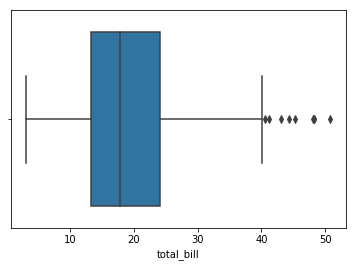

In [11]:
sns.boxplot(x=df['total_bill']);

In [12]:
# kartil nedir?
# veri-setinin küçükten büyüğe sıralandıktan sonra 4 bölüme ayrılması sonucu o kesilmeleri temsil eden elemanı belirtmektir.
# örn 12 elemanlı bir veri setinde 3 - 3 - 3 - 3 olarak ayrılır. ve kartiller de bu 3 - 3 bölgelerindeki 2 elemana göre hesaplanır.

# boxplot grafiği nedir?
# kartiller (quartils) üzerinden oluşturulmuş bir grafiktir.
# en soldaki siyah çizgi 0% (başlangıç)
# mavi kutucuğun sol kenarı 25% => 1 kartil (ilk-çeyrek kartili)
# mavi kutucuğun ortasındaki çizgi 50% => 2.kartil (yarı)
# mavi kutucuğun sağ kenarı 75% => 3.kartil
# son siyah siyah nokta 100% => bitiş 

# peki neden sonda siyah nokta kullanılmış?
# veri setinde dağılıma göre aykırı gözüken değerleri boxplot siyah nokta ile işaretler.

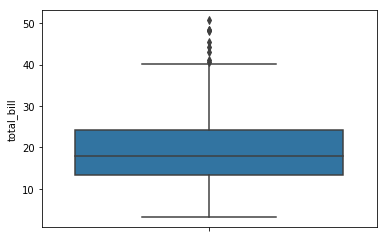

In [13]:
 sns.boxplot(x=df['total_bill'], orient='v'); # vertical boxplot

## Çaprazlamalar ##

In [14]:
# Veri setini incelerken aklımıza gelen soruları cevaplayalım

In [15]:
# Hangi günler daha fazla kazanıyoruz.

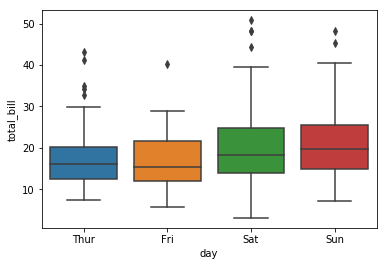

In [16]:
sns.boxplot(x='day',y='total_bill',data=df);

In [17]:
# cumartesi daha çok müşteri olmasına rağmen pazar günü daha çok hesap ödenmiş

In [18]:
# sabah mı akşam mı daha çok kazanıyoruz

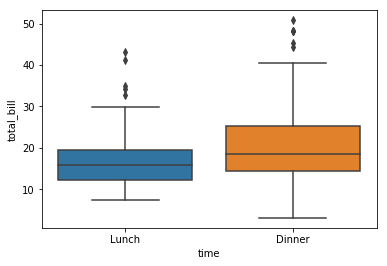

In [19]:
sns.boxplot(x='time',y='total_bill',data=df);

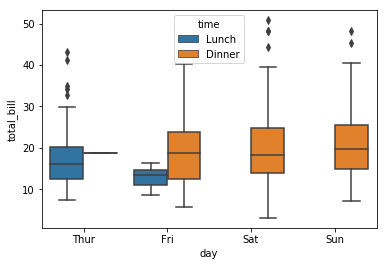

In [20]:
# günlere göre sabah akşam
sns.boxplot(x='day',y='total_bill',hue='time',data=df);

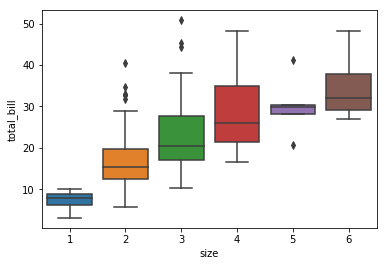

In [21]:
# kişi sayısı-kazanç
sns.boxplot(x='size',y='total_bill',data=df);

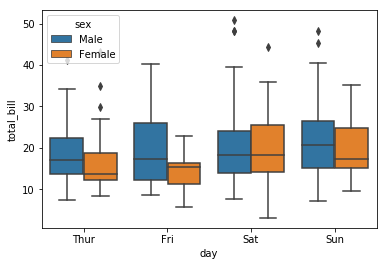

In [22]:
# kişi günler-cinsiyet-ödenen-hesap
sns.boxplot(x='day',y='total_bill',hue='sex',data=df);

# Violin Grafiği # 

In [23]:
# catplot içindeki farklı bir tür grafiktir. boxplot ile yoğunluk grafiğinin çaprazlanması ile oluşur.
# kartiller ve bu kartillerdeki yoğunlukları gösterir.

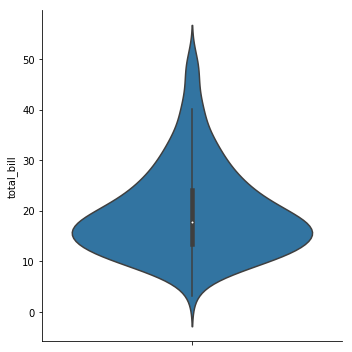

In [24]:
sns.catplot(y='total_bill',data=df,kind='violin');

In [25]:
# içerideki siyah çizgi kartilleri temsil eder. dışarıdaki mavi alan yoğunlukları temsil eder.

### Violin Çaprazlamalar ###

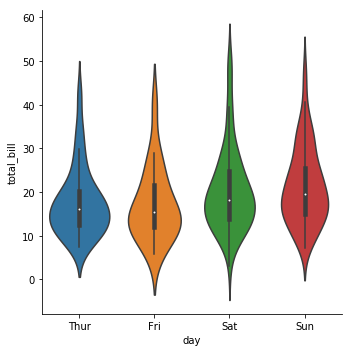

In [26]:
sns.catplot(x='day',y='total_bill',kind='violin',data=df);

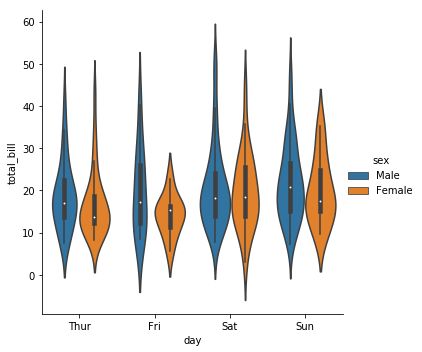

In [27]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',data=df);

## Korelasyon Grafikleri ##

In [28]:
# Korelasyon grafiği nedir?
# iki değişken arasındaki ilişkiyi anlamak için yapılan grafiktir.
# en bilineni scatterplot (saçılım grafiğidir.)
# scatter plot 2 sayısal değişken arasındaki ilişkiyi anlamk için kullanılır.

# bundan önce öğrendiğimiz grafikler : 
# 1 kategorik değişken için: catplot 
# 1 sayısal değişken için : distplot , kdeplot , boxplot , violin
# bu grafiklere 2. değişken olarak eklediğimiz boyutsal olarak ekleme idi.

In [29]:
# korelasyon grafiğinde ise 2 sayısal değişkenin aynı anda 
# oluşturduğu grafik denilebilir. boyutlar eklenerek 3-4-5. boyut olabilir.

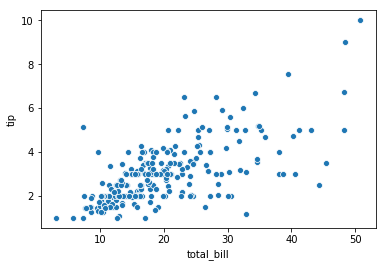

In [30]:
sns.scatterplot(x='total_bill',y='tip',data=df);

### Çaprazlamalar ###

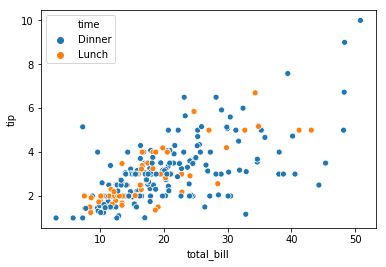

In [31]:
sns.scatterplot(x='total_bill',y='tip',hue='time',data=df);

In [32]:
# korelasyon grafiği istatistiksel bir grafiktir.
# grafikte oluşan şekillerin belirli bir mantığı ve yorum noktaları olur.

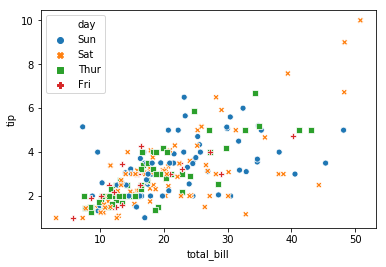

In [33]:
sns.scatterplot(x='total_bill',y='tip',hue='day',style='day',data=df);

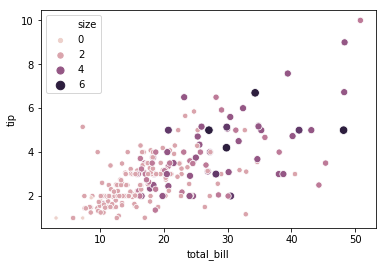

In [34]:
# sürekli değişkeni bir boyut olarak ekleme
sns.scatterplot(x='total_bill',y='tip',hue='size',size='size',data=df);

## Doğrusal İlişkinin Gösterilmesi ##

In [35]:
import matplotlib.pyplot as plt

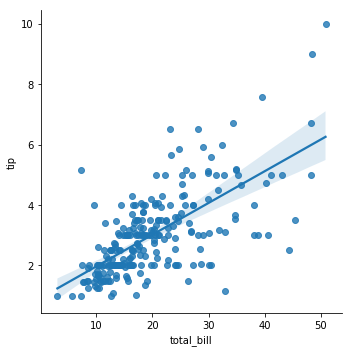

In [36]:
sns.lmplot(x='total_bill',y='tip',data=df);

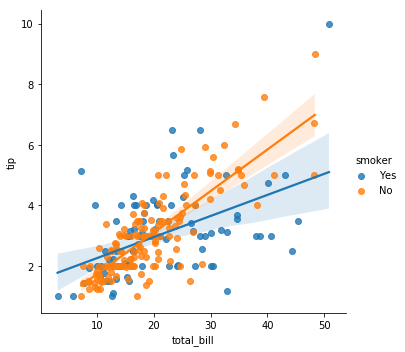

In [38]:
# boyut ekleyelim. Farklı boyutlar ekleyerek çözümlemelerimizdeki yanılmalardan kurtulabiliriz.
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=df);

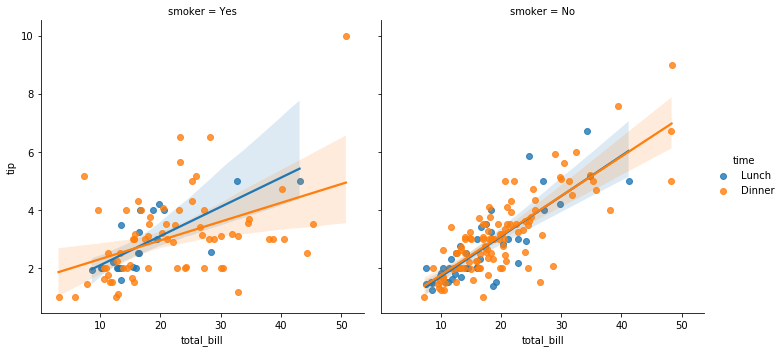

In [41]:
# 'col' parametresi ile yeni bir boyut daha ekleyelim.

sns.lmplot(x='total_bill',y='tip',hue='time',col='smoker',data=df);

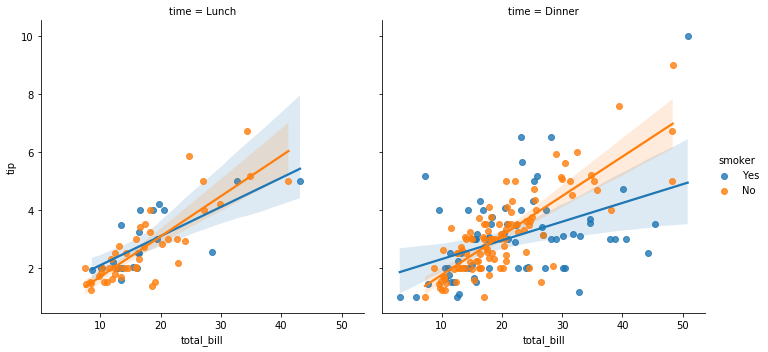

In [42]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',data=df);

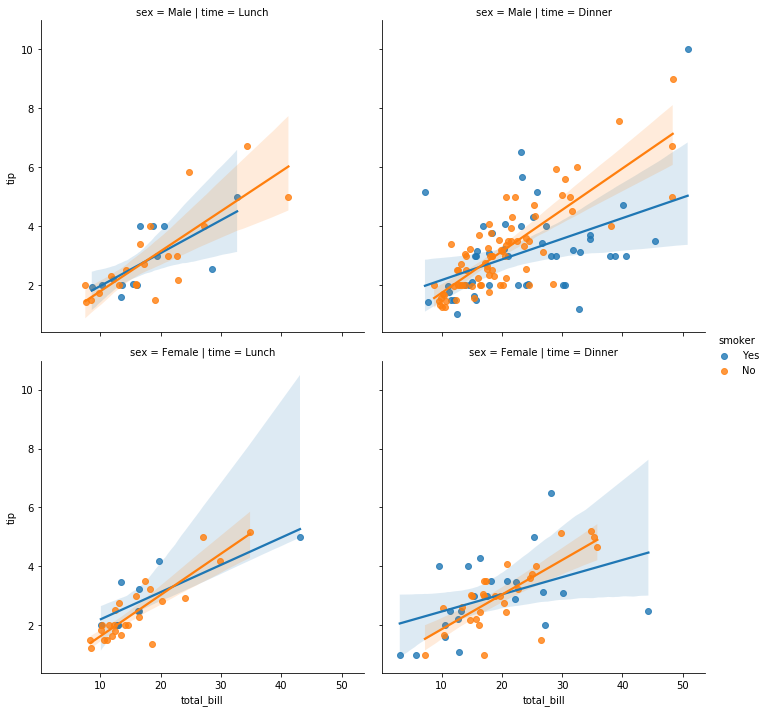

In [44]:
# 'row' parametresi ile bir boyut daha...
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',row='sex',data=df);

In [46]:
# bundan sonraki aşamada bu çıkan sonuçların mantıklı olup olmadığını sorgulamamız lazım. (Korelasyon)

## Scatterplot Matrix'i ##

In [ ]:
# scatterplot 2 sayısal değişkenin birbirine göre ilişkisinde kullanılan bir grafikti.
# aynı mantık ile bir veri setindeki değişkenlerin birbirine göre ilişkisini temsil eden bir matrixtir.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.dtypes #species object tipi nominal. bu yüzden kategoriye çevirmeye gerek yok

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
df.shape

(150, 5)

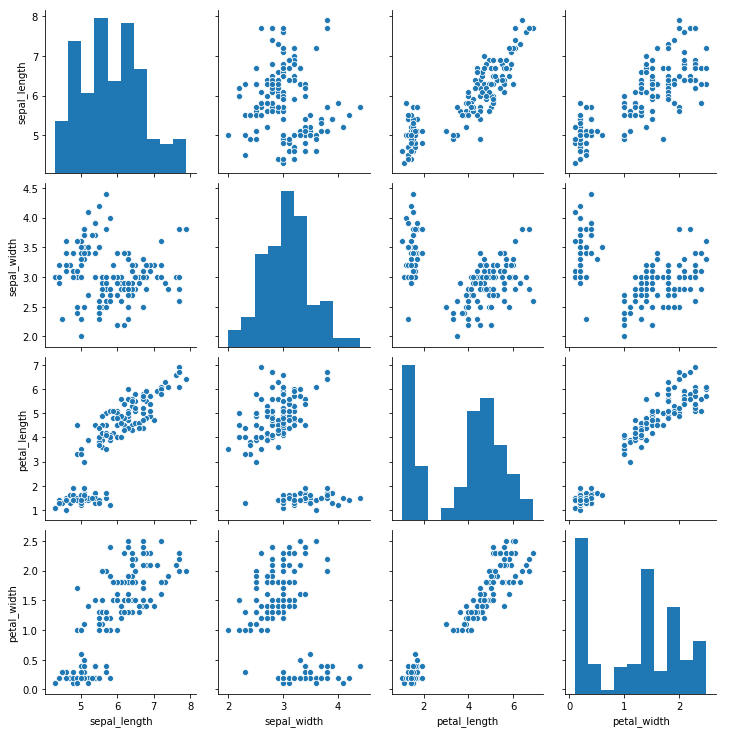

In [4]:
sns.pairplot(df); # köşegen dağılım grafiği => diğer bölgeler scatterplot

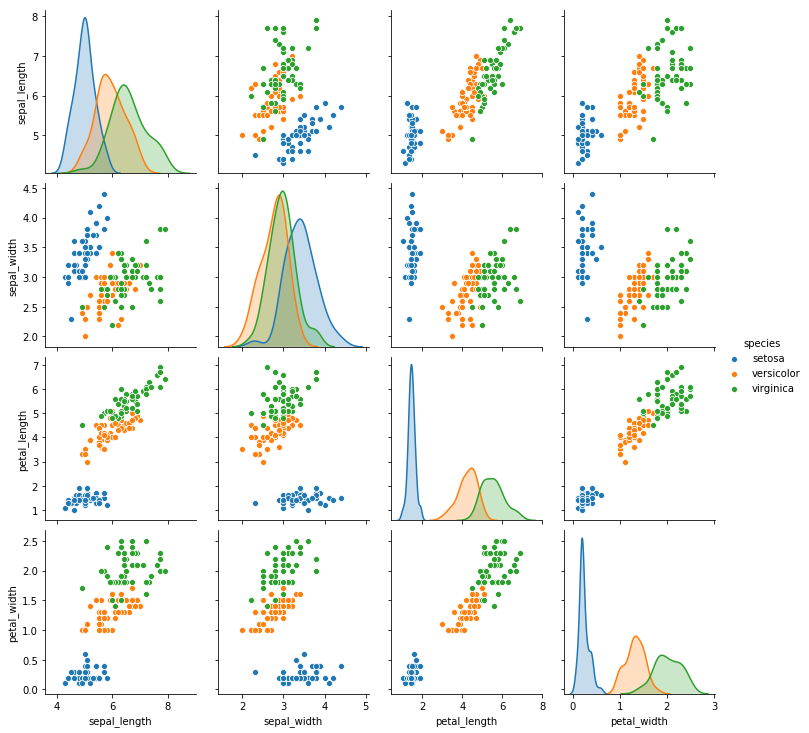

In [5]:
# kategorik değişken ekleme....

sns.pairplot(df,hue='species');

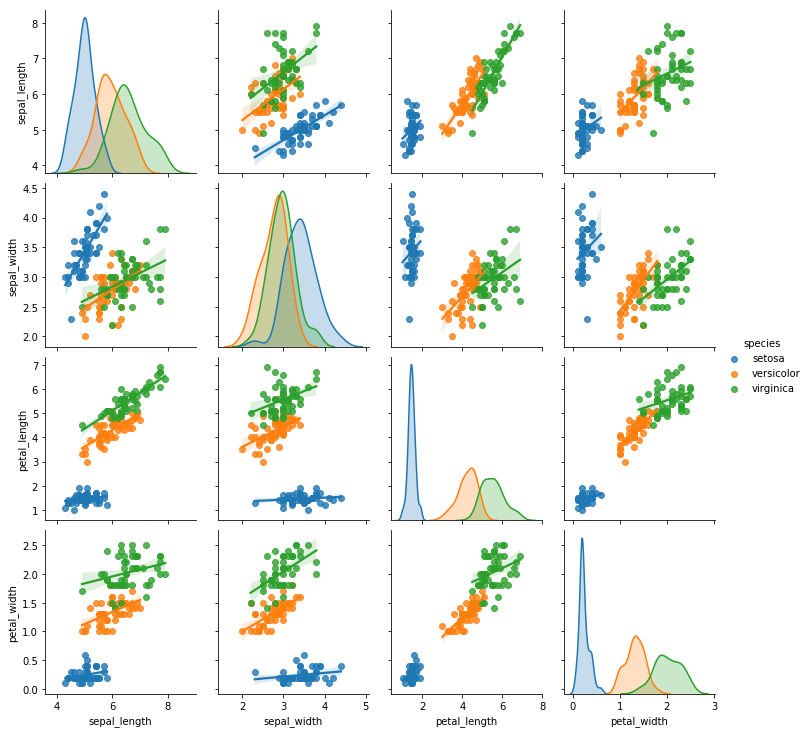

In [13]:
# regresssion => grafiğe doğru ekleme
sns.pairplot(hue='species',kind='reg',data=df);

## Heatmap (Isı Haritası) ##

In [14]:
# büyük verilerde örneğe sahip verilerde ve tekrarlayan yapılarda. verinin yapısını anlamamızı sağlayan bir grafiktir.

In [30]:
import seaborn as sns
flights = sns.load_dataset('flights');
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [31]:
df.shape

(144, 3)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [ ]:
# heatmap data olarak pivot table şeklinde bir veriseti istiyor.
# bu sebep ile veri setimizi pivot table haline getirelim.

df = df.pivot('month','year','passengers'); #x, y, values

In [37]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


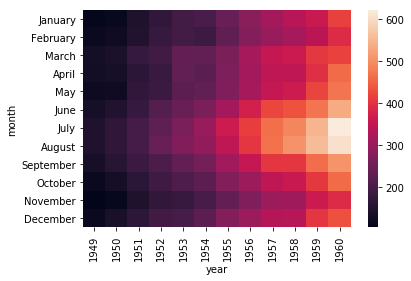

In [38]:
# heatmap => elimizde pattern detection (yapı saptama) sorunu olduğunda heatmap yardımcı olur.
# büyük veriyi tablodan kolayca değerlendiremeyiz. bu şekilde kolayca değerlendirebiliriz.
sns.heatmap(df);

In [39]:
# heatmap görselleştirme biçimlendirmeleri.

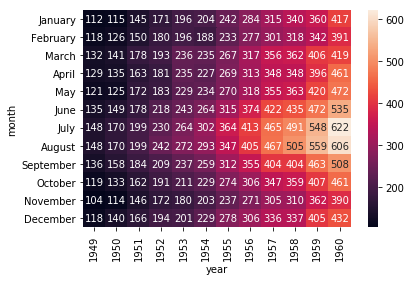

In [42]:
# hücrelere değerlerini ekleme
sns.heatmap(df,annot=True,fmt='d');

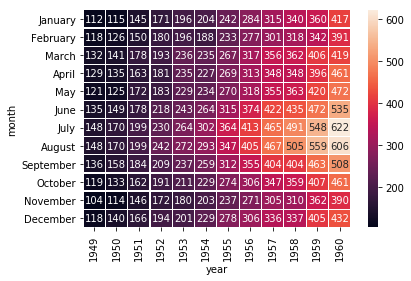

In [45]:
# kenar ayarlama
sns.heatmap(df,annot=True,fmt='d',linewidths=0.2);

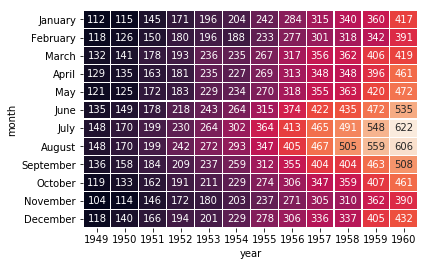

In [46]:
# color bar kaldırma
sns.heatmap(df,annot=True,fmt='d',linewidths=0.2,cbar=False);

## Çizgi Grafik ##

In [48]:
# zamana bağlı grafik oluşturulması gerektiğinde ve  IoT cihazların log kayıtlarının grafiği oluşturulması gerektiğinde kullanılması gerekir.
import seaborn as sns
fmri = sns.load_dataset('fmri')
df = fmri.copy()
df.head()

# veri seti hikayesi
# kişilerin beynine bağlanan bir cihazın verdiği log kayıtları.
# subject => person_id
# timepoint => zaman noktaları
# event => olaylar
# region => toplandığı bölge
# signal => sinyal

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [50]:
df.shape

(1064, 5)

In [53]:
df.info() # time-point aralıklı integer olduğundan kategorik değişken denilebilir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.6+ KB


In [59]:
# ilk amacımız her bir zaman noktasında (timepoints) signal değerini inceleyebiliriz 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [64]:
# her bir zaman noktasında eşit derecede signal mi var?
df.groupby('timepoint')['signal'].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [69]:
# peki her bir signal değeri birbirinden farklı mı ?
df.groupby('signal').count() # 1064 tane grup var yani her bir signal değeri farklı 

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
-0.176453,1,1,1,1
-0.169312,1,1,1,1
-0.160821,1,1,1,1
-0.159772,1,1,1,1


In [71]:
# her bir timepoint in ayrı istatistik değerlerine bakalım.
df.groupby('timepoint')['signal'].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


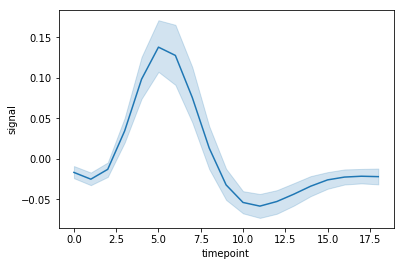

In [73]:
# timepoint / signal
sns.lineplot(x='timepoint',y='signal',data=df);
# seaborn aggregated (toplulaştırma) işlemleri yaparak grafik hazırlar.
# gördüğümüz mavi çizgi 56 gözlemin ortalamasıdır.
# açık mavi alan ise bu değerlerin standart sapmasıdır.


# bu grafiğe göre timepointlerde değerler sıkılaşıp yükselmiş.
# bazı noktalarda genişleyip düşmüş

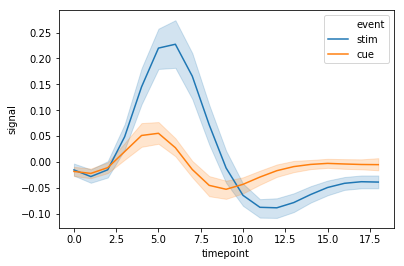

In [78]:
# görüldüğü üzere pick-up yapan kategori tipi 'stim'.
sns.lineplot(x='timepoint',y='signal',hue='event',data=df);

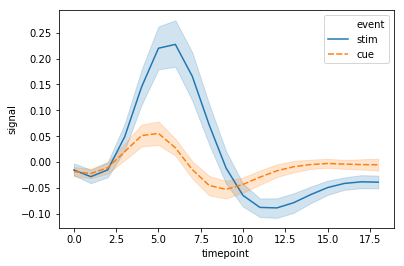

In [80]:
# biçimlendirme
sns.lineplot(x='timepoint',y='signal',hue='event',style='event',data=df);

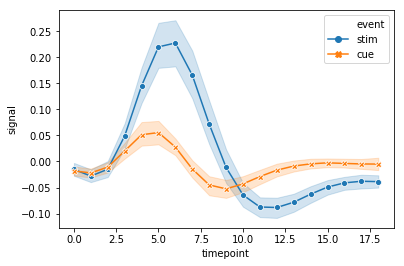

In [81]:
sns.lineplot(x='timepoint',
             y='signal',
             hue='event',
             style='event',
             markers=True,
             dashes = False,
             data=df);

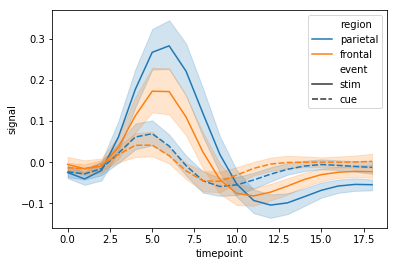

In [84]:
# bir boyut daha ekleyelim
sns.lineplot(x='timepoint',
             y='signal',
             hue='region',
             style='event',
             data=df);

## Basit Zaman Serisi Grafiği ##

In [112]:
import pandas_datareader as pr
import pandas as pd

In [113]:
df = pd.read_csv('AAPL.csv')

In [114]:
df.set_index('Date',drop = True,inplace=True)

In [115]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000


In [116]:
df.shape

(917, 6)

In [119]:
close = df['Close']
close.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

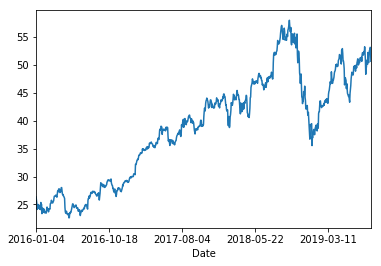

In [122]:
close.plot();

In [124]:
# index değerimiz bir tarih değişkeni. fakat olmadığı durumda yapılacak şey

In [129]:
close.index = pd.DatetimeIndex(close.index)